# Important Library, Files & Data Preprocessing

In [4]:
#importing libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
# Setting path for saving images

from pathlib import Path
IMAGES_PATH = Path() / "Diagrams"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Reading Dataset

In [7]:
# Reading the Dataset

df = pd.read_csv("../Dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Applying Profiling

In [2]:
 #Applying Profiling for Data Preprocessing
#!pip install ydata-profiling
#!pip install ydata-profiling[notebook]

from ydata_profiling import ProfileReport
prof = ProfileReport(df, title="Employee Attrition Dataset Profile Report")
prof.to_file(output_file='Dataset Profile.html')

ModuleNotFoundError: No module named 'ydata_profiling'

## Setting Independant & Dependant Features

In [8]:
# Separating the Independent and Dependent Variables
columns_to_drop = [
    'EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber',
    'JobLevel', 'Department', 'PerformanceRating', 'DailyRate', 'Education',
    'HourlyRate', 'JobInvolvement', 'MonthlyRate', 'PercentSalaryHike',
    'RelationshipSatisfaction', 'TrainingTimesLastYear', 'YearsInCurrentRole',
    'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'
]
X = df.drop(columns=columns_to_drop)
y = df['Attrition'].map({'Yes': 1, 'No': 0})

In [9]:
X.shape

(1470, 16)

In [10]:
X.head()

,Age,BusinessTravel,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany
0,41,Travel_Rarely,1,Life Sciences,2,Female,Sales Executive,4,Single,5993,8,Yes,0,8,1,6
1,49,Travel_Frequently,8,Life Sciences,3,Male,Research Scientist,2,Married,5130,1,No,1,10,3,10
2,37,Travel_Rarely,2,Other,4,Male,Laboratory Technician,3,Single,2090,6,Yes,0,7,3,0
3,33,Travel_Frequently,3,Life Sciences,4,Female,Research Scientist,3,Married,2909,1,Yes,0,8,3,8
4,27,Travel_Rarely,2,Medical,1,Male,Laboratory Technician,2,Married,3468,9,No,1,6,3,2


## One Hot Embedding for Catagorical attributes

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['BusinessTravel', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' 
)


In [12]:
X.head()

,Age,BusinessTravel,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany
0,41,Travel_Rarely,1,Life Sciences,2,Female,Sales Executive,4,Single,5993,8,Yes,0,8,1,6
1,49,Travel_Frequently,8,Life Sciences,3,Male,Research Scientist,2,Married,5130,1,No,1,10,3,10
2,37,Travel_Rarely,2,Other,4,Male,Laboratory Technician,3,Single,2090,6,Yes,0,7,3,0
3,33,Travel_Frequently,3,Life Sciences,4,Female,Research Scientist,3,Married,2909,1,Yes,0,8,3,8
4,27,Travel_Rarely,2,Medical,1,Male,Laboratory Technician,2,Married,3468,9,No,1,6,3,2


In [13]:
# Applying the preprocessor to X
X_transformed = preprocessor.fit_transform(X)

# Getting encoded column names from OneHotEncoder
encoded_col_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Getting remaining numerical feature names
numerical_features = [col for col in X.columns
                      if col not in categorical_features]

# Combining all column names
all_column_names = list(encoded_col_names) + numerical_features

# Converting the result into a DataFrame with column names
X = pd.DataFrame(X_transformed, columns=all_column_names)

X.head()


,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,...,Age,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,41.0,1.0,2.0,4.0,5993.0,8.0,0.0,8.0,1.0,6.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,49.0,8.0,3.0,2.0,5130.0,1.0,1.0,10.0,3.0,10.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,37.0,2.0,4.0,3.0,2090.0,6.0,0.0,7.0,3.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.0,3.0,4.0,3.0,2909.0,1.0,0.0,8.0,3.0,8.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,27.0,2.0,1.0,2.0,3468.0,9.0,1.0,6.0,3.0,2.0


In [14]:
X.columns

Index(['BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes', 'Age',
       'DistanceFromHome', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MonthlyIncome', 'NumCompaniesWorked', 'StockOptionLevel',
       'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [15]:
# Checking for Missing Values
X.isnull().sum()

BusinessTravel_Travel_Frequently    0
BusinessTravel_Travel_Rarely        0
EducationField_Life Sciences        0
EducationField_Marketing            0
EducationField_Medical              0
EducationField_Other                0
EducationField_Technical Degree     0
Gender_Male                         0
JobRole_Human Resources             0
JobRole_Laboratory Technician       0
JobRole_Manager                     0
JobRole_Manufacturing Director      0
JobRole_Research Director           0
JobRole_Research Scientist          0
JobRole_Sales Executive             0
JobRole_Sales Representative        0
MaritalStatus_Married               0
MaritalStatus_Single                0
OverTime_Yes                        0
Age                                 0
DistanceFromHome                    0
EnvironmentSatisfaction             0
JobSatisfaction                     0
MonthlyIncome                       0
NumCompaniesWorked                  0
StockOptionLevel                    0
TotalWorking

## Spliting the Dataset

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [17]:
X_train.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,...,Age,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany
1194,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,47.0,2.0,2.0,2.0,15972.0,6.0,3.0,29.0,3.0,3.0
128,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,22.0,2.0,3.0,4.0,2523.0,0.0,1.0,3.0,3.0,2.0
810,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,46.0,3.0,1.0,3.0,17465.0,3.0,1.0,23.0,3.0,12.0
478,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,25.0,13.0,2.0,3.0,2096.0,1.0,0.0,7.0,3.0,7.0
491,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,43.0,9.0,4.0,3.0,5679.0,3.0,1.0,10.0,3.0,8.0


In [18]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Feature Scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaleVars = ['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobSatisfaction', 
             'MonthlyIncome','NumCompaniesWorked', 'StockOptionLevel','TotalWorkingYears',
             'WorkLifeBalance','YearsAtCompany']
mms = MinMaxScaler()
X_train[scaleVars] = mms.fit_transform(X_train[scaleVars])
X_test[scaleVars] = mms.transform(X_test[scaleVars])

In [20]:
X_train.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,...,Age,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany
1194,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.690476,0.035714,0.333333,0.333333,0.789021,0.666667,1.000000,0.725,0.666667,0.081081
128,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.095238,0.035714,0.666667,1.000000,0.079835,0.000000,0.333333,0.075,0.666667,0.054054
810,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.666667,0.071429,0.000000,0.666667,0.867749,0.333333,0.333333,0.575,0.666667,0.324324
478,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.166667,0.428571,0.333333,0.666667,0.057319,0.111111,0.000000,0.175,0.666667,0.189189
491,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.595238,0.285714,1.000000,0.666667,0.246256,0.333333,0.333333,0.250,0.666667,0.216216


# Classification Report

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
#from xgboost import XGBClassifier

def evaluate_classifiers(train_X, train_y, test_X, test_y):
    classifiers = {
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Logistic Regression': LogisticRegression(),
        'SVC': SVC(random_state = 20),
        'Random Forest': RandomForestClassifier(),
        'AdaBoost': AdaBoostClassifier(),
      #  'XGBoost': XGBClassifier()
    }
    
    results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])
    
    for name, classifier in classifiers.items():
        classifier.fit(train_X, train_y)
        predictions = classifier.predict(test_X)
        
        accuracy = accuracy_score(test_y, predictions)
        precision = precision_score(test_y, predictions)
        recall = recall_score(test_y, predictions)
        f1 = f1_score(test_y, predictions)
        roc_auc = roc_auc_score(test_y, predictions)
        
        results.loc[name] = [accuracy, precision, recall, f1, roc_auc]
    
    return results

In [23]:
results_df = evaluate_classifiers(X_train, y_train, X_test, y_test)
print(results_df)

                     Accuracy  Precision    Recall  F1 Score   ROC AUC
KNN                  0.853741   0.700000  0.148936  0.245614  0.568395
Decision Tree        0.795918   0.348837  0.319149  0.333333  0.602894
Logistic Regression  0.867347   0.750000  0.255319  0.380952  0.619562
SVC                  0.857143   0.777778  0.148936  0.250000  0.570420
Random Forest        0.836735   0.466667  0.148936  0.225806  0.558274
AdaBoost             0.819728   0.333333  0.127660  0.184615  0.539538


## Decision Tree

In [24]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

def draw_decision_tree(decision_tree, feature_names=None, class_names=None):
    plt.figure(figsize=(20, 10))
    plot_tree(decision_tree, feature_names=feature_names, class_names=class_names, filled=True)
    plt.show()

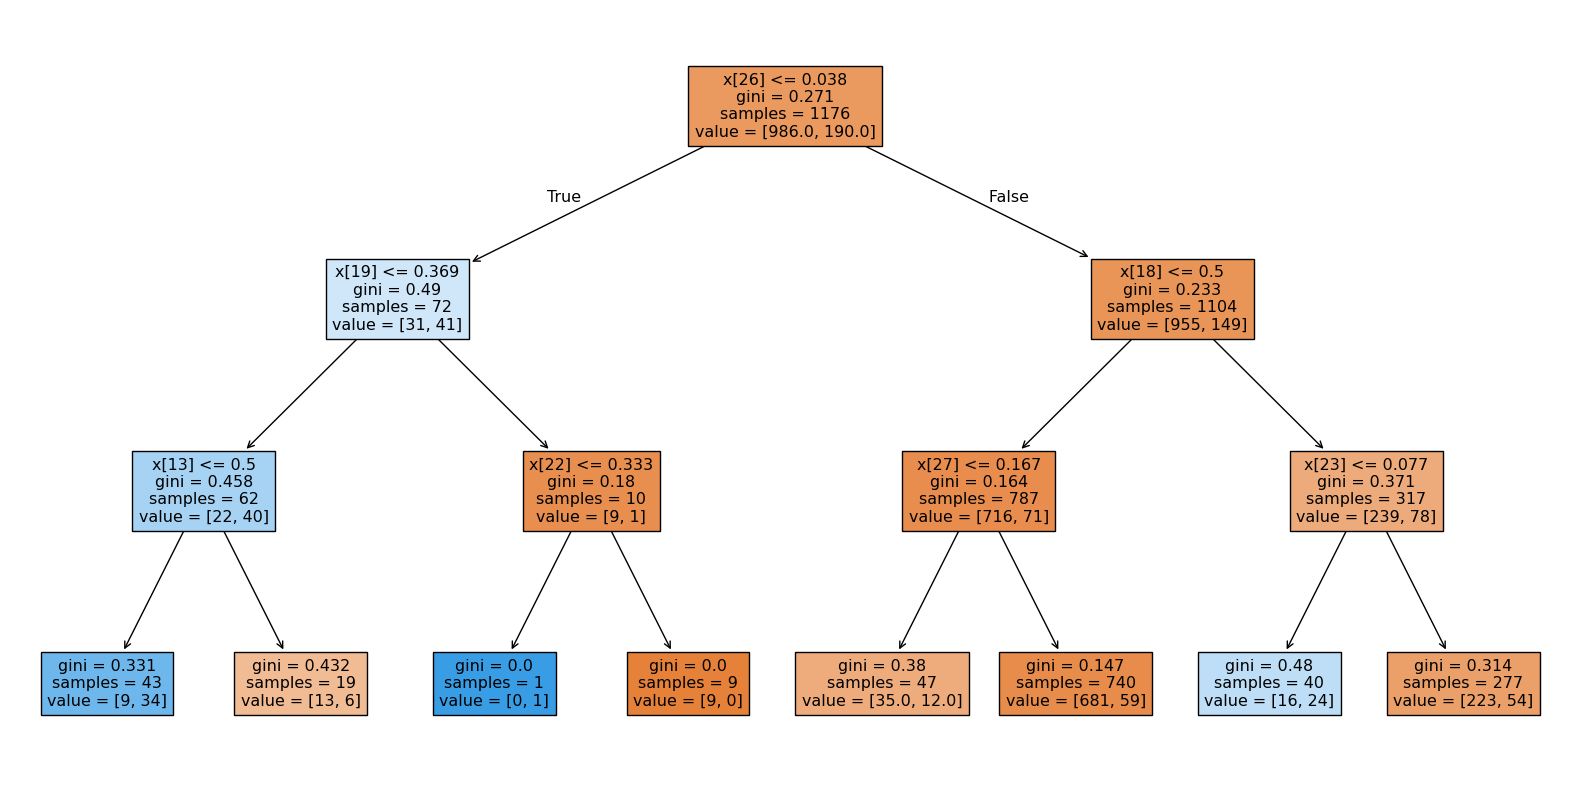

In [25]:
feature_names = [str(name) for name in X_train.columns]
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train, y_train)
# Draw the decision tree
draw_decision_tree(dt)